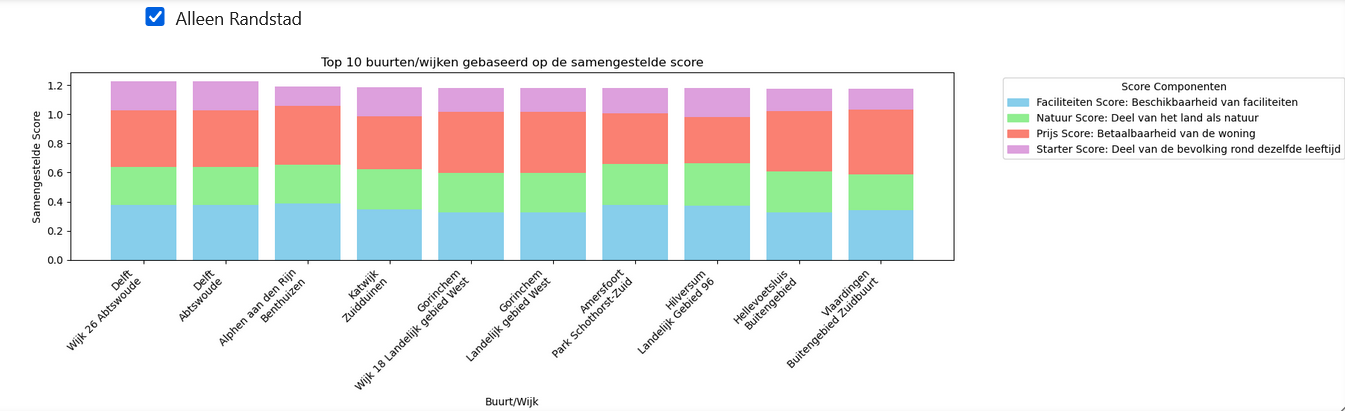

Het doel van deze notebook is om een data gesubstantieerd advies te schrijven om de casus te beantwoorden. Het plan is om dit te doen aan de hand van een Multi-Criteria Decision Analysis (MCDA) Weighted Sum Model (WSM), waar er meerdere indicatoren worden ontwikkeld die verschillende aspecten van de vergelijking representeren (betaalbaarheid, faciliteiten in de buurt, toegang tot natuur, etc.) en met individuele wegingen een 'geschiktheidsscore' vormen. Omdat een WSM afhangt van domeinexperts/doelgroepsvoorkeuren, zal ik meerdere opties simuleren.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import ipywidgets as widgets
from ipywidgets import interactive
from matplotlib.patches import Patch
import seaborn as sns

# Laad Data

In [2]:
df1 = pd.read_csv("data/data_1.csv")
df2 = pd.read_csv("data/data_2.csv")

df3 = pd.read_csv("data/Bodemgebruik__wijk__en_buurtcijfers_2017_02052025_150059.csv",
                  sep=';')  # voor een betere 'groen' indicator

In [3]:
df1

,Unnamed: 0.1,Unnamed: 0,ID,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,AantalInwoners_5,Mannen_6,Vrouwen_7,...,Hoekwoning_50,TweeOnderEenKapWoning_51,VrijstaandeWoning_52,AfstandTotHuisartsenpraktijk_94,AfstandTotGroteSupermarkt_95,AfstandTotKinderdagverblijf_96,AfstandTotSchool_97,ScholenBinnen3Km_98,TotaleOppervlakte_4,BouwgrondOpp
0,0,0,0,Nederland,Nederland,Land,NL00,17081507,8475102,8606405,...,3100.0,3430.0,4040.0,1.0,0.9,0.8,0.7,11.2,4154302,434426
1,1,1,1,Aa en Hunze,Aa en Hunze,Gemeente,GM1680,25286,12603,12683,...,2640.0,3090.0,3700.0,2.5,2.3,1.1,1.2,1.8,27887,5992
2,2,2,2,Wijk 00 Annen,Aa en Hunze,Wijk,WK168000,3545,1710,1835,...,2860.0,3300.0,3810.0,1.0,0.9,0.5,0.8,2.4,1478,53
3,3,3,3,Annen,Aa en Hunze,Buurt,BU16800000,3395,1635,1760,...,2860.0,3300.0,3720.0,0.9,0.8,0.5,0.7,2.5,252,3
4,4,4,4,Verspreide huizen Annen,Aa en Hunze,Buurt,BU16800009,150,80,75,...,NaN,NaN,4830.0,2.7,2.1,1.7,2.1,1.2,1226,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16662,16662,16662,16662,Gerenbroek,Zwolle,Buurt,BU01935150,3165,1555,1610,...,2990.0,3470.0,4020.0,0.9,0.7,0.5,0.6,11.7,49,0
16663,16663,16663,16663,Oude Mars,Zwolle,Buurt,BU01935160,90,45,45,...,NaN,NaN,5910.0,1.5,1.6,1.6,1.6,8.9,45,0
16664,16664,16664,16664,Wijk 52 Soestweteringlanden,Zwolle,Wijk,WK019352,900,445,450,...,2850.0,3700.0,3840.0,3.9,4.0,1.1,1.1,2.9,1194,134
16665,16665,16665,16665,Windesheim,Zwolle,Buurt,BU01935200,400,190,205,...,2830.0,3390.0,3750.0,4.8,4.9,0.4,0.4,1.0,53,0


In [4]:
df2

,Unnamed: 0,RegioS,GemiddeldeVerkoopprijs_1,GemiddeldeWOZWaardeVanWoningen_1,GemiddeldeDoorlooptijd_12
0,0,Nederland,307978.0,29900.0,22.0
1,1,Noord-Nederland (LD),230412.0,22700.0,20.0
2,2,Oost-Nederland (LD),281575.0,27900.0,21.0
3,3,West-Nederland (LD),344342.0,33100.0,22.0
4,4,Zuid-Nederland (LD),290853.0,28800.0,22.0
...,...,...,...,...,...
379,379,Castricum,369741.0,34600.0,21.0
380,380,Goeree-Overflakkee,274637.0,27100.0,16.0
381,381,Tynaarlo,309779.0,30000.0,13.0
382,382,'s-Gravenhage gemeente,324838.0,32200.0,21.0


In [5]:
df3

,Wijken en buurten,Regioaanduiding/Gemeentenaam (naam),Regioaanduiding/Soort regio (omschrijving),Regioaanduiding/Codering (code),Totale oppervlakte (ha),Recreatieterrein/Totaal recreatieterrein (ha),Recreatieterrein/Park en plantsoen (ha),Recreatieterrein/Sportterrein (ha),Recreatieterrein/Volkstuin (ha),Recreatieterrein/Dagrecreatief terrein (ha),...,Binnenwater/Spaarbekken (ha),Binnenwater/Recreatief binnenwater (ha),Binnenwater/Binnenwater voor delfstofwinning (ha),Binnenwater/Vloei- en/of slibveld (ha),Binnenwater/Overig binnenwater (ha),Buitenwater/Totaal buitenwater (ha),"Buitenwater/Waddenzee, Eems, Dollard (ha)",Buitenwater/Oosterschelde (ha),Buitenwater/Westerschelde (ha),Buitenwater/Noordzee (ha)
0,Nederland,Nederland,Land,NL00,4154302,108335,32863,36288,3608,11526,...,1240,11104,2976,484,110008,415211,254432,34578,29812,96389
1,Aa en Hunze,Aa en Hunze,Gemeente,GM1680,27887,569,29,162,6,9,...,0,71,25,4,180,0,0,0,0,0
2,Wijk 00 Annen,Aa en Hunze,Wijk,WK168000,1478,23,5,11,0,0,...,0,0,0,0,13,0,0,0,0,0
3,Annen,Aa en Hunze,Buurt,BU16800000,252,13,5,8,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Verspreide huizen Annen,Aa en Hunze,Buurt,BU16800009,1226,10,0,3,0,0,...,0,0,0,0,13,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16849,Gerenbroek,Zwolle,Buurt,BU01935150,49,2,2,0,0,0,...,0,0,0,0,2,0,0,0,0,0
16850,Oude Mars,Zwolle,Buurt,BU01935160,45,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
16851,Wijk 52 Soestweteringlanden,Zwolle,Wijk,WK019352,1194,9,2,5,0,0,...,0,0,0,0,64,0,0,0,0,0
16852,Windesheim,Zwolle,Buurt,BU01935200,53,3,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Cleaning/Prep & EDA

In [6]:
df1.duplicated(subset=df1.drop(columns=["Unnamed: 0.1", "Unnamed: 0", "ID"]).columns).value_counts()  # geen duplicaten

False    16667
Name: count, dtype: int64

In [7]:
df2.duplicated(subset=df2.drop(columns=['Unnamed: 0']).columns.tolist()).value_counts()  # 10 duplicaten

False    374
True      10
Name: count, dtype: int64

In [8]:
df2[df2["RegioS"].isin(df2['RegioS'].value_counts()[df2['RegioS'].value_counts() >= 2].index.tolist())].sort_values(
    "RegioS")

,Unnamed: 0,RegioS,GemiddeldeVerkoopprijs_1,GemiddeldeWOZWaardeVanWoningen_1,GemiddeldeDoorlooptijd_12
126,126,'s-Gravenhage gemeente,324838.0,32200.0,21.0
382,382,'s-Gravenhage gemeente,324838.0,32200.0,21.0
33,33,Apeldoorn,287155.0,29500.0,22.0
374,374,Apeldoorn,287155.0,29500.0,22.0
57,57,Bladel,334264.0,32300.0,19.0
377,377,Bladel,334264.0,32300.0,19.0
76,76,Castricum,369741.0,34600.0,21.0
379,379,Castricum,369741.0,34600.0,21.0
119,119,Goeree-Overflakkee,274637.0,27100.0,16.0
380,380,Goeree-Overflakkee,274637.0,27100.0,16.0


Omdat de duplicaten niet altijd dezelfde gegevens bevatten houd ik de rij met de minste NaN waardes.

In [9]:
df2["nan_count"] = df2.isna().sum(axis=1)  # tel nans

In [10]:
df2 = df2.sort_values(by="nan_count", ascending=True).drop_duplicates(subset='RegioS', keep='first')

In [11]:
df1['Gemeentenaam_1'].iloc[0]  # sommige velden hebben extra spaties

'Nederland                               '

In [12]:
strip_targets = [
    (df1, ['Gemeentenaam_1', 'SoortRegio_2']),
    (df3, [
        'Regioaanduiding/Gemeentenaam (naam)',
        'Regioaanduiding/Soort regio (omschrijving)'
    ])
]

for df, columns in strip_targets:
    for col in columns:
        df[col] = df[col].str.strip()

Er is helaas alleen maar toegang tot data op gemeente niveau in df2. Ik join df2 daarom bij df1 op gemeente, i.p.v. wijk/buurt. Ik doe voor nu een left join zodat ik alle data uit df1 behoud. NaN rows kunnen later weggegooid worden.

In [13]:
df_merged = df1.merge(df2, how='left', left_on='Gemeentenaam_1', right_on='RegioS')
df_merged.shape

(16667, 47)

Ik kijk alleen maar naar wijken en buurten, en niet naar gemeentes, als mogelijke locaties om een wijk bij te bouwen. Gemeentes zijn te groot wat ervoor zorgt dat sommige variabelen hun waarde verliezen (de variabelen over faciliteiten bijvoorbeeld). Er zijn sommige buurten met genoeg vrije plek om een wijk bij te bouwen.

In [14]:
df_merged = df_merged[df_merged['SoortRegio_2'].isin(['Wijk', 'Buurt'])]

Er zijn ook wat 'nep' buurten/wijken die verzamelingen van verspreide huizen zijn. Deze worden ook verwijderd.

In [15]:
df_merged = df_merged[~df_merged['WijkenEnBuurten'].isin(
    list(set(df_merged[df_merged['WijkenEnBuurten'].str.lower().str.contains('verspr')]['WijkenEnBuurten']))
)]

In [16]:
df_merged.shape

(14546, 47)

Ik hanteer een minimum bouwbare oppervlakte van 5 hectare. Met een gemiddelde dichtheid van 25 woningen per hectare https://www.pbl.nl/uploads/default/downloads/711931008.pdf, komt dit uit op 'maximaal' 125 woningen.

In [17]:
15000000 /(1200 * 120) # voor deel 2 bouwen we in ieder geval nooit meer dan 104 woningen

104.16666666666667

In [18]:
df_merged = df_merged[df_merged['BouwgrondOpp'] > 5]

In [19]:
df_merged.shape

(3664, 47)

Zoals je kan zien zijn er nog wel redelijk wat rows met NaN waardes, deze zullen alleen worden verwijderd wanneer een specifieke variabele ook echt gebruikt wordt, zodat zoveel mogelijk data behouden wordt.

In [20]:
df_merged.isna().sum()

Unnamed: 0.1                           0
Unnamed: 0_x                           0
ID                                     0
WijkenEnBuurten                        0
Gemeentenaam_1                         0
SoortRegio_2                           0
Codering_3                             0
AantalInwoners_5                       0
Mannen_6                               0
Vrouwen_7                              0
k_0Tot15Jaar_8                         0
k_15Tot25Jaar_9                        0
k_25Tot45Jaar_10                       0
k_45Tot65Jaar_11                       0
k_65JaarOfOuder_12                     0
GeboorteTotaal_24                      0
GeboorteRelatief_25                    0
SterfteTotaal_26                       0
SterfteRelatief_27                     0
HuishoudensTotaal_28                   0
Eenpersoonshuishoudens_29              0
HuishoudensZonderKinderen_30           0
HuishoudensMetKinderen_31              0
GemiddeldeHuishoudensgrootte_32       77
Bevolkingsdichth

Ik plot hier alvast de distributie van een deel van de variabelen die zo verder worden toegelicht voor het MCDA.

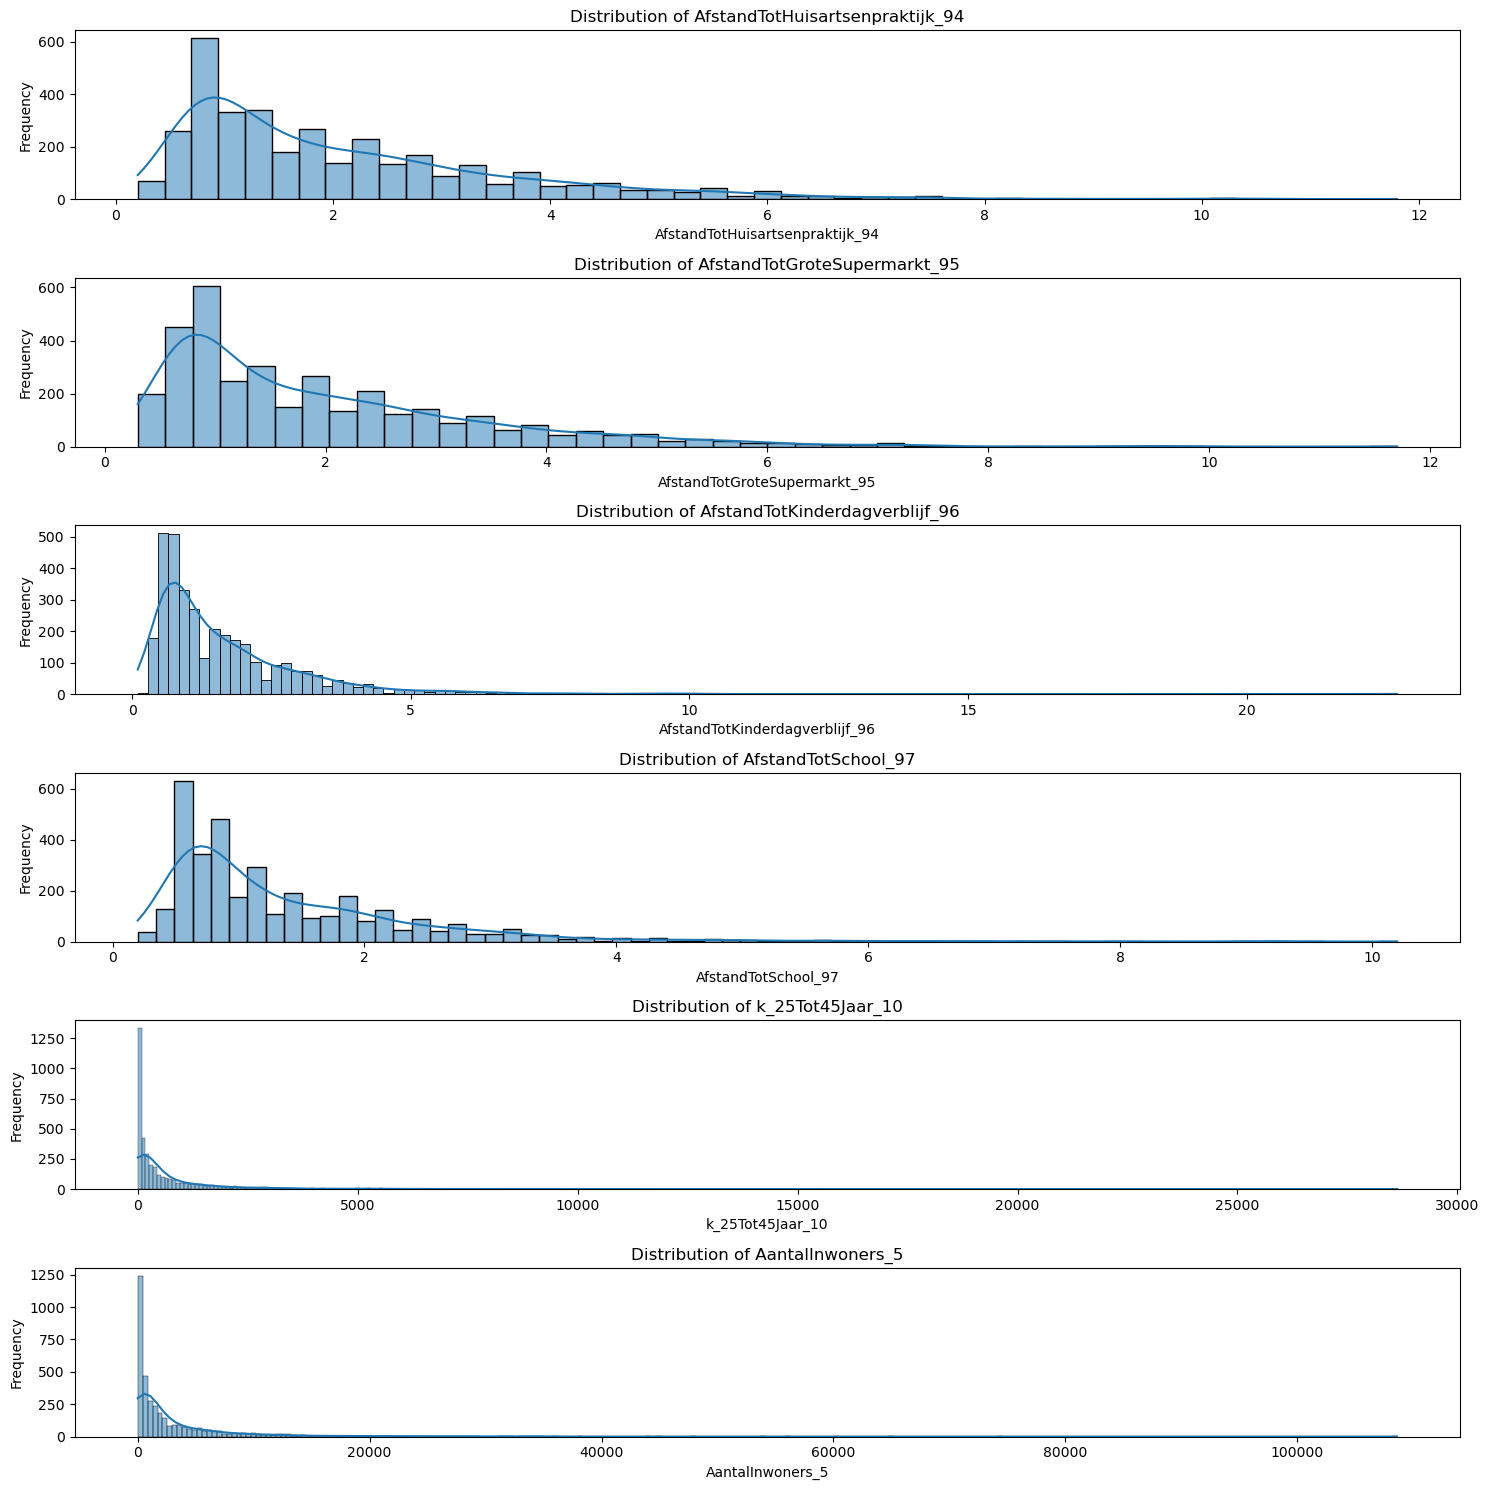

In [21]:
fig, axes = plt.subplots(6,1, figsize=(15, 15))

axes = axes.flatten()

for i, column in enumerate(df_merged[["AfstandTotHuisartsenpraktijk_94", "AfstandTotGroteSupermarkt_95", "AfstandTotKinderdagverblijf_96",
                    "AfstandTotSchool_97", "k_25Tot45Jaar_10", "AantalInwoners_5"]]): 
    sns.histplot(df_merged[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Selectie Variabelen

In dit deel selecteer/ontwikkel ik de scores die verschillende beoordelingscriteria zullen representeren. Ik gebruik een MinMaxScaler om de scores in een 0-1 range te krijgen. Ik gebruik geen z-score normalisatie omdat geen van de kolommen normaal verdeeld is.

In [22]:
facility_columns = ["AfstandTotHuisartsenpraktijk_94", "AfstandTotGroteSupermarkt_95", "AfstandTotKinderdagverblijf_96",
                    "AfstandTotSchool_97"]

Deze faciliteiten variabelen zijn belangrijk in onze analyse en kunnen daarom niet NaN zijn, ik gebruik geen imputation omdat er geen indicatie is dat deze variabelen betrouwbaar afgeleid kunnen worden van andere variabelen. Ze correleren uiteraard wel zwak negatief met variabelen zoals bevolkingsdichtheid (~-0.35).

In [23]:
df_merged[facility_columns].isna().sum()

AfstandTotHuisartsenpraktijk_94    151
AfstandTotGroteSupermarkt_95       151
AfstandTotKinderdagverblijf_96     151
AfstandTotSchool_97                170
dtype: int64

In [24]:
df_merged = df_merged.dropna(subset=facility_columns)

In [25]:
scaler = MinMaxScaler()
normalized_values = 1 - scaler.fit_transform(df_merged[facility_columns])

df_merged['facility_score'] = normalized_values.mean(axis=1)

Als variabele die toegang tot natuur representeerd zou ik ook iets als bevolkingsdichtheid kunnen gebruiken. Dit is echter een redelijk slechte representatie. Ik zou ook een variabele kunnen creëren door het totale oppervlakte land te delen door het aantal huizen, maar ook dit is niet de beste indicator voor natuur en zorgt er ook nog eens voor dat ik veel data weg moet gooien (veel NaN in huizen data).

### Ik heb er daarom voor gekozen om een externe dataset te gebruiken van, ook weer, het CBS (https://opendata.cbs.nl/statline/#/CBS/nl/dataset/85217NED/table?ts=1746190523272) met veel informatie over de natuur per wijk/buurt.

Ik gebruik de variabelen: Totaal recreatieterrein, totaal bos en open natuurlijk terrein, totaal agrarisch terrein, en totaal buitenwater.

In [26]:
df_merged = pd.merge(
    df_merged,
    df3[['Totale oppervlakte (ha)',
         'Recreatieterrein/Totaal recreatieterrein (ha)',
         'Bos en open natuurlijk terrein/Totaal  bos en open natuurlijk terrein (ha)',
         'Agrarisch terrein/Totaal agrarisch terrein (ha)',
         'Buitenwater/Totaal buitenwater (ha)',
         'Wijken en buurten', 'Regioaanduiding/Gemeentenaam (naam)',
         'Regioaanduiding/Soort regio (omschrijving)']],
    how='inner',  # only loses 2 rows
    left_on=['WijkenEnBuurten', 'Gemeentenaam_1', 'SoortRegio_2'],
    right_on=['Wijken en buurten', 'Regioaanduiding/Gemeentenaam (naam)', 'Regioaanduiding/Soort regio (omschrijving)']
)

In [27]:
df_merged['nature_score'] = (
                                    df_merged['Recreatieterrein/Totaal recreatieterrein (ha)']
                                    + df_merged[
                                        'Bos en open natuurlijk terrein/Totaal  bos en open natuurlijk terrein (ha)']
                                    + df_merged['Agrarisch terrein/Totaal agrarisch terrein (ha)']
                                    + df_merged['Buitenwater/Totaal buitenwater (ha)']
                            ) / df_merged['Totale oppervlakte (ha)']

scaler = MinMaxScaler()
df_merged['nature_score_normalized'] = scaler.fit_transform(df_merged[['nature_score']])

In [28]:
df_merged.sort_values(by='nature_score', ascending=False)[:10][['WijkenEnBuurten', 'Gemeentenaam_1']]

,WijkenEnBuurten,Gemeentenaam_1
920,Gortel,Epe
2646,Pijnenburg,Soest
2415,Wodanswoud,Renkum
2807,Wijk 05 Oosterend,Terschelling
2478,Buurtschap Holterberg,Rijssen-Holten
250,Buitengebied kootwijk,Barneveld
787,Reemst,Ede
2395,Quadenoord,Renkum
919,Wijk 03 Bosgebied,Epe
249,Wijk 62 Kootwijk,Barneveld


Een score die de betaalbaarheid representeert, dit is wel betaalbaarheid per regio dus het is niet per se 100% nauwkeurig.

In [29]:
df_merged = df_merged.dropna(subset='GemiddeldeVerkoopprijs_1') # drop alle rijen waar er geen verkoopdata voor is

In [30]:
scaler = MinMaxScaler()
df_merged['price_score'] = 1 - scaler.fit_transform(df_merged[['GemiddeldeVerkoopprijs_1']])

Helaas is er alleen maar de categorie 25-45 jaar om onze starters te representeren i.p.v. 25-35. Dit is niet ideaal maar het is een variabele die mogelijk waardevol kan zijn in ons besluit.

In [31]:
df_merged['starter_score'] = df_merged['k_25Tot45Jaar_10'] / df_merged['AantalInwoners_5']
scaler = MinMaxScaler()
df_merged['starter_score'] = 1 - scaler.fit_transform(df_merged[['starter_score']])

In [32]:
df_merged[['nature_score', 'facility_score', 'starter_score', 'price_score']].describe()

,nature_score,facility_score,starter_score,price_score
count,3177.000000,3177.000000,3177.000000,3177.000000
mean,0.742310,0.875598,0.719562,0.782320
std,0.232912,0.092420,0.093367,0.124702
min,0.024704,0.138274,0.000000,0.000000
25%,0.587629,0.828984,0.682563,0.741334
50%,0.835938,0.897534,0.717949,0.807899
75%,0.930416,0.947836,0.761741,0.850938
max,1.000000,0.987371,1.000000,1.000000


# Multi-Criteria Decision Analysis (MCDA)

In [38]:
def bar_plot(facility_weight, nature_weight, price_weight, starter_weight, df, n, only_randstad):
    randstad_gemeenten = [
        'Amsterdam', 'Rotterdam', "'s-Hertogenbosch", 'Utrecht', 'Almere', 'Haarlem',
        'Haarlemmermeer', 'Amersfoort', 'Zaanstad', 'Leiden', 'Zoetermeer', 'Dordrecht',
        'Westland', 'Alphen aan den Rijn', 'Alkmaar', 'Delft','Gorinchem', 'Ridderkerk', 'Capelle aan den IJssel', 'Schiedam', 'Spijkenisse', 'Hellevoetsluis', 'Vlaardingen', 'Katwijk', 'Hoofddorp', 'Zandvoort', 'IJmuiden', 'Beverwijk', 'Zaandam', 'Amstelveen', 'Hilversum', 'Zeist', 'Houten', 'Nieuwegein']
    
    
    df = df.copy()
    if only_randstad:
        df = df[df['Gemeentenaam_1'].isin(randstad_gemeenten)]

    df['facility_contrib'] = df['facility_score'] * facility_weight
    df['nature_contrib'] = df['nature_score'] * nature_weight
    df['price_contrib'] = df['price_score'] * price_weight
    df['starter_contrib'] = df['starter_score'] * starter_weight

    df['total_score'] = (
        df['facility_contrib'] +
        df['nature_contrib'] +
        df['price_contrib'] +
        df['starter_contrib']
    )

    top_n = df.sort_values(by='total_score', ascending=False).head(n)
    top_n['combined_label'] = top_n['Gemeentenaam_1'] + '\n' + top_n['WijkenEnBuurten']

    fig, ax = plt.subplots(figsize=(18, 5))
    bar1 = ax.bar(top_n['combined_label'], top_n['facility_contrib'], label='Facility Score', color='skyblue')
    bar2 = ax.bar(top_n['combined_label'], top_n['nature_contrib'], bottom=top_n['facility_contrib'], label='Nature Score', color='lightgreen')
    bar3 = ax.bar(top_n['combined_label'], top_n['price_contrib'], bottom=top_n['facility_contrib'] + top_n['nature_contrib'], label='Price Score', color='salmon')
    bar4 = ax.bar(top_n['combined_label'], top_n['starter_contrib'], 
           bottom=top_n['facility_contrib'] + top_n['nature_contrib'] + top_n['price_contrib'],
           label='Starter Score', color='plum')

    ax.set_xlabel('Buurt/Wijk')
    ax.set_ylabel('Samengestelde Score')
    ax.set_title(f'Top {n} buurten/wijken gebaseerd op de samengestelde score')

    descriptions = [
        Patch(color='skyblue', label='Faciliteiten Score: Beschikbaarheid van faciliteiten'),
        Patch(color='lightgreen', label='Natuur Score: Deel van het land als natuur'),
        Patch(color='salmon', label='Prijs Score: Betaalbaarheid van de woning'),
        Patch(color='plum', label='Starter Score: Deel van de bevolking rond dezelfde leeftijd'),
    ]
    ax.legend(handles=descriptions, title='Score Componenten', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

facility_weight_box = widgets.FloatText(value=1.0, description='Faciliteiten gewicht:', step=0.1)
nature_weight_box = widgets.FloatText(value=1.0, description='Natuur gewicht:', step=0.1)
price_weight_box = widgets.FloatText(value=1.0, description='Prijs gewicht:', step=0.1)
starter_weight_box = widgets.FloatText(value=1.0, description='Starter gewicht:', step=0.1)
n_box = widgets.IntSlider(value=10, min=1, max=30, step=1, description='Top N:')
only_randstad_box = widgets.Checkbox(value=False, description='Alleen Randstad')

interactive_plot = interactive(
    bar_plot,
    facility_weight=facility_weight_box,
    nature_weight=nature_weight_box,
    price_weight=price_weight_box,
    starter_weight=starter_weight_box,
    df=widgets.fixed(df_merged),  
    n=n_box,
    only_randstad=only_randstad_box
)

In [40]:
display(interactive_plot)

interactive(children=(FloatText(value=1.0, description='Faciliteiten gewicht:', step=0.1), FloatText(value=1.0…

In [35]:
df_merged.isna().sum()

Unnamed: 0.1                                                                     0
Unnamed: 0_x                                                                     0
ID                                                                               0
WijkenEnBuurten                                                                  0
Gemeentenaam_1                                                                   0
SoortRegio_2                                                                     0
Codering_3                                                                       0
AantalInwoners_5                                                                 0
Mannen_6                                                                         0
Vrouwen_7                                                                        0
k_0Tot15Jaar_8                                                                   0
k_15Tot25Jaar_9                                                                  0
k_25

In [36]:
df_merged[df_merged['SoortRegio_2'] == 'Buurt'].describe()['BouwgrondOpp']

count    1634.000000
mean      107.416157
std       316.564099
min         6.000000
25%        11.000000
50%        25.000000
75%        70.000000
max      5331.000000
Name: BouwgrondOpp, dtype: float64

In [37]:
df_merged.sort_values('BouwgrondOpp', ascending = False)

,Unnamed: 0.1,Unnamed: 0_x,ID,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,AantalInwoners_5,Mannen_6,Vrouwen_7,...,Bos en open natuurlijk terrein/Totaal bos en open natuurlijk terrein (ha),Agrarisch terrein/Totaal agrarisch terrein (ha),Buitenwater/Totaal buitenwater (ha),Wijken en buurten,Regioaanduiding/Gemeentenaam (naam),Regioaanduiding/Soort regio (omschrijving),nature_score,nature_score_normalized,price_score,starter_score
784,4520,4520,4520,Otterlo,Ede,Wijk,WK022890,2455,1275,1180,...,8758,1248,0,Otterlo,Ede,Wijk,0.978248,0.977697,0.781661,0.723467
919,5014,5014,5014,Wijk 03 Bosgebied,Epe,Wijk,WK023203,370,180,190,...,6334,255,0,Wijk 03 Bosgebied,Epe,Wijk,0.991677,0.991466,0.725374,0.843844
2115,10832,10832,10832,Wijk 01 Elspeet-Vierhouten,Nunspeet,Wijk,WK030201,5225,2630,2595,...,5949,785,0,Wijk 01 Elspeet-Vierhouten,Nunspeet,Wijk,0.975074,0.974443,0.746491,0.704200
787,4523,4523,4523,Reemst,Ede,Buurt,BU02289051,55,30,25,...,5331,195,0,Reemst,Ede,Buurt,0.991844,0.991637,0.781661,0.737374
3418,16142,16142,16142,Wijk 00,Zeewolde,Wijk,WK005000,22455,11550,10905,...,5564,17308,0,Wijk 00,Zeewolde,Wijk,0.935651,0.934021,0.821705,0.650066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,4440,4440,4440,Bosrand,Ede,Buurt,BU02280102,385,190,195,...,6,5,0,Bosrand,Ede,Buurt,0.327273,0.310233,0.781661,0.681097
3285,15592,15592,15592,Vinkega,Weststellingwerf,Buurt,BU00980701,130,65,60,...,6,157,0,Vinkega,Weststellingwerf,Buurt,0.970588,0.969843,0.884317,0.777778
2091,10781,10781,10781,Rutten-woonkern,Noordoostpolder,Buurt,BU01711149,910,465,440,...,6,4,0,Rutten-woonkern,Noordoostpolder,Buurt,0.395833,0.380530,0.894199,0.682540
2442,11955,11955,11955,Wijk 01 Rhenen Oost,Rhenen,Wijk,WK034001,3350,1635,1715,...,6,4,0,Wijk 01 Rhenen Oost,Rhenen,Wijk,0.123457,0.101255,0.696207,0.691708
